In [19]:
import kaggle as kg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as s
import os

In [20]:
os.environ["USERNAME"]= 'avdhesh02'
os.environ["KEY"] = "52ce86ec35a9087219ba70726bd130b3"

In [21]:
kg.api.authenticate()

In [22]:
kg.api.dataset_download_files(dataset="uciml/breast-cancer-wisconsin-data",path ="./dataset",
                              unzip =True)

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [23]:
data = pd.read_csv("dataset/data.csv")

In [24]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [26]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
data.drop(labels=[data.columns[0],data.columns[-1]],axis=1,inplace=True)

In [28]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
data[data.columns[0]].replace(to_replace=['B','M'],value=[0,1],inplace=True)

/tmp/ipykernel_6233/990141940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[data.columns[0]].replace(to_replace=['B','M'],value=[0,1],inplace=True)
/tmp/ipykernel_6233/990141940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data.columns[0]].replace(to_replace=['B','M'],value=[0

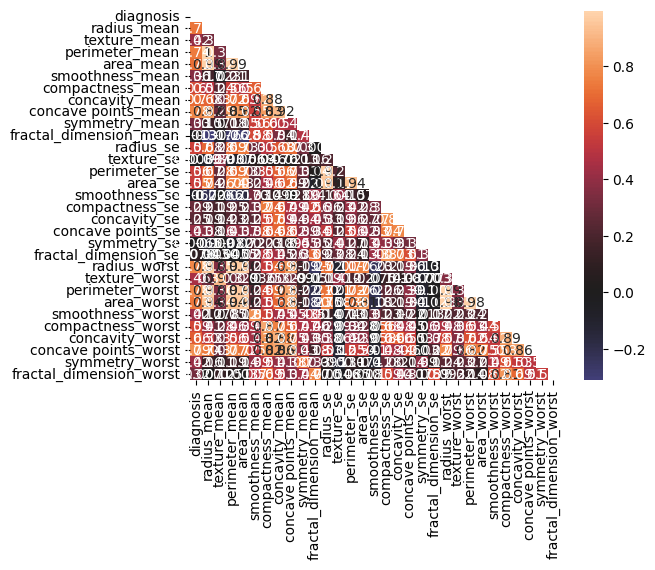

In [30]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [31]:
selected_features = list(data_corr[(data_corr[data.columns[0]] < -0.5) | (data_corr[data.columns[0]] > 0.5)].index)

In [32]:
selected_features

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [33]:
refined_data = data[selected_features]

In [34]:
refined_data

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [35]:
X_transpose = np.array(refined_data.iloc[:,1:])
X_transpose = (X_transpose - np.mean(X_transpose,axis=0))/np.std(X_transpose,axis=0)
y = np.array(refined_data.iloc[:,0]).reshape(refined_data.shape[0],1)

In [36]:
pd.DataFrame(X_transpose)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,1.886690,2.303601,2.001237,2.616665,2.109526,2.296076
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,1.805927,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,1.511870,1.347475,1.456285,1.082932,0.854974,1.955000
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,-0.281464,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,1.298575,1.338539,1.220724,-0.313395,0.613179,0.729259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,2.060786,2.343856,0.219060,1.947285,2.320965,2.782080,2.379583,2.604187,1.901185,1.752563,2.015301,-0.273318,0.664512,1.629151
565,1.704854,1.615931,1.723842,-0.017833,0.693043,1.263669,1.300499,1.156857,1.291565,1.536720,1.421940,1.494959,-0.394820,0.236573,0.733827
566,0.702284,0.672676,0.577953,-0.038680,0.046588,0.105777,0.184892,0.276693,0.180698,0.561361,0.579001,0.427906,0.350735,0.326767,0.414069
567,1.838341,1.982524,1.735218,3.272144,3.296944,2.658866,1.157935,1.438530,1.009503,1.961239,2.303601,1.653171,3.904848,3.197605,2.289985


In [37]:
def sigmoid(theta0,theta):

    return 1/(1 + np.exp(-(theta0 + np.matmul(X_transpose,theta))))

In [38]:
def bce(theta0,theta):

    p = sigmoid(theta0,theta)
    first_term = np.matmul(np.transpose(y),np.log(p))
    second_term = np.matmul(np.transpose(1-y),np.log(1-p))

    return -(1/p.shape[0])*(first_term + second_term)

In [39]:
def del_bce_by_del_theta(theta0,theta):

    p = sigmoid(theta0,theta)
    error_transpose = np.transpose(p - y)

    del_by_del_theta0 = np.mean(error_transpose)
    del_by_del_theta = (1/y.shape[0])*np.transpose(np.matmul(error_transpose,X_transpose))

    return [del_by_del_theta0,del_by_del_theta]

In [40]:
epsilon = 10**(-4)
epoch_counter = 0
theta0_initial = 0
theta_initial = np.zeros((X_transpose.shape[1],1))
tol = 10**(-5)

while True:

    initial_gradients = del_bce_by_del_theta(theta0_initial,theta_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta_final = theta_initial - (epsilon * initial_gradients[1])

    bce_initial_value = bce(theta0_initial,theta_initial)
    bce_final_value = bce(theta0_final,theta_final)

    if abs(bce_initial_value - bce_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta_initial = theta_final

    print("Epoch # {}, BCE Value = {}".format(epoch_counter,bce_initial_value[0,0]))

Epoch # 1, BCE Value = 0.6931471805599453
Epoch # 2, BCE Value = 0.6929788835825583
Epoch # 3, BCE Value = 0.692810679096261
Epoch # 4, BCE Value = 0.6926425670495252
Epoch # 5, BCE Value = 0.6924745473908118
Epoch # 6, BCE Value = 0.6923066200685721
Epoch # 7, BCE Value = 0.6921387850312484
Epoch # 8, BCE Value = 0.691971042227272
Epoch # 9, BCE Value = 0.6918033916050653
Epoch # 10, BCE Value = 0.6916358331130414
Epoch # 11, BCE Value = 0.6914683666996041
Epoch # 12, BCE Value = 0.691300992313147
Epoch # 13, BCE Value = 0.6911337099020557
Epoch # 14, BCE Value = 0.6909665194147061
Epoch # 15, BCE Value = 0.6907994207994653
Epoch # 16, BCE Value = 0.6906324140046917
Epoch # 17, BCE Value = 0.6904654989787349
Epoch # 18, BCE Value = 0.6902986756699355
Epoch # 19, BCE Value = 0.6901319440266261
Epoch # 20, BCE Value = 0.6899653039971307
Epoch # 21, BCE Value = 0.6897987555297649
Epoch # 22, BCE Value = 0.6896322985728363
Epoch # 23, BCE Value = 0.6894659330746439
Epoch # 24, BCE Value =